In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('Logistic_X_Train.csv').values
y = pd.read_csv('Logistic_Y_Train.csv').values

In [28]:
print(X.shape)
y = y.reshape((y.shape[0], ))
print(y.shape)

(3000, 3)
(3000,)


In [29]:
# logistic regression algorithm
def hypothesis(x, theta, bias):
    z = np.dot(x, theta) + bias
    return sigmoid(z)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1 * z))

def error(X, y, theta, bias):
    m = X.shape[0]
    
    e = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta, bias)
        e += y[i]*np.log2(y_) + (1-y[i])*np.log2(1-y_)
        
    return -e/m

def gradient(X, y, theta, bias):
    # no. of feature
    n = theta.shape
    
    grad_w = np.zeros(n)
    grad_b = 0.0
    
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i], theta, bias)
        grad_w += (y[i] - y_) * X[i]
        grad_b += (y[i] - y_)
        
    return [grad_w/m, grad_b/m]

def predict(x, theta, bias):
    y_ = hypothesis(x, theta, bias)
    
    if y_ < 0.5:
        return 0
    else:
        return 1

def accuracy(X, y, theta, bias):
    pred_list = []
    
    for i in range(y.shape[0]):
        p = predict(X[i], theta, bias)
        pred_list.append(p)
    
    pred_list = np.array(pred_list)
    return float((pred_list == y).sum())/y.shape[0]
    
def gradientDescent(X, y, learning_rate = 0.1, max_steps = 1000):
    n = X.shape[1]
    error_list = []
    theta = np.zeros((n, ))
    bias = 0.0
    
    for i in range(max_steps):
        e = error(X, y, theta, bias)
        error_list.append(e)
        
        [grad_w, grad_b] = gradient(X, y, theta, bias)
        theta = theta + learning_rate * grad_w
        bias = bias + learning_rate * grad_b
        
        a = accuracy(X, y, theta, bias)
        
    return error_list, theta, bias, a

In [30]:
# training
error_list, theta, bias, acc = gradientDescent(X, y)

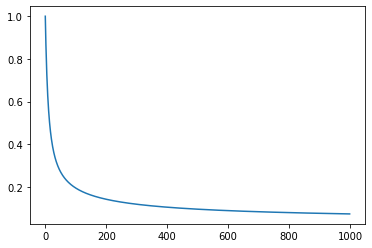

In [31]:
plt.plot(error_list)
plt.show()

In [32]:
a = accuracy(X, y, theta, bias)

In [33]:
print(a)

0.992


In [34]:
X_test = pd.read_csv('Logistic_X_Test.csv').values

In [35]:
print(X_test.shape)

(1000, 3)


In [38]:
labels = []
for i in range(X_test.shape[0]):
    p = predict(X_test[i], theta, bias)
    labels.append(p)

In [39]:
labels = np.array(labels)
print(labels.shape)

(1000,)


In [40]:
df = pd.DataFrame(data = labels, columns = ['label'])

In [41]:
df.head()

,label
0,1
1,1
2,0
3,1
4,1


In [42]:
df.to_csv('answer.csv', index = False)